<a href="https://colab.research.google.com/github/Buy-me-some-str/practice/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

!pip3 install catboost
import catboost as cb

In [ ]:
data = pd.read_excel('data.xlsx')
data = data.iloc[:, 3]
data

0      6.4
1      6.8
2      7.1
3      7.4
4      7.4
      ... 
343    3.8
344    3.9
345    3.9
346    3.7
347    3.7
Name: value, %, Length: 348, dtype: float64

In [ ]:
data.fillna(method='bfill', inplace=True)

In [ ]:
data.isna().sum()

0

In [ ]:
data = data.to_numpy()
data

array([ 6.4,  6.8,  7.1,  7.4,  7.4,  7.4,  7.5,  7.7,  7.7,  7.7,  7.8,
        7.8,  7.9,  8.1,  8. ,  8.2,  8.3,  8.4,  8.5,  8.8,  8.9,  9.2,
        9.1,  9. ,  9.1,  9.3,  9.2,  9.5,  9.6,  9.6,  9.7,  9.7,  9.8,
        9.8,  9.9, 10. , 10.1, 10.3, 10.5, 10.7, 10.9, 10.9, 10.9, 10.9,
       11. , 11.1, 11.2, 11.2, 11.4, 11.6, 11.7, 11.7, 11.5, 11.3, 11.3,
       11.6, 11.9, 12.3, 12.8, 13.2, 12.2, 14.6, 14.1, 13.4, 12.7, 12.3,
       12.1, 12. , 12.1, 12.4, 12.6, 12.4, 12.2, 12.1, 11.4, 10.8, 10.2,
       10.1, 10. ,  9.8,  9.8,  9.8,  9.8,  9.9, 10. , 10.2,  9.6,  9.1,
        8.6,  8.6,  8.6,  8.6,  8.7,  8.8,  8.9,  8.7,  8.6,  8.4,  8.3,
        8.3,  8.2,  7.5,  7.3,  7.1,  7.6,  8.1,  8.5,  8.8,  9.3,  9.6,
        9.2,  8.8,  8.5,  8.4,  8.3,  8.2,  8.2,  8.2,  8.2,  8.6,  9.1,
        9.5,  8.9,  8.2,  7.6,  7.5,  7.4,  7.3,  7.7,  8. ,  8.4,  8.3,
        8.3,  8.3,  8. ,  7.6,  7.3,  7.3,  7.2,  7.1,  7.2,  7.3,  7.5,
        7.7,  7.7,  7.9,  7.8,  7.6,  7.5,  7.2,  6

In [ ]:
window = 7

X = np.lib.stride_tricks.sliding_window_view(data, window)

In [ ]:
y = data[window::]

In [ ]:
X

array([[6.4, 6.8, 7.1, ..., 7.4, 7.4, 7.5],
       [6.8, 7.1, 7.4, ..., 7.4, 7.5, 7.7],
       [7.1, 7.4, 7.4, ..., 7.5, 7.7, 7.7],
       ...,
       [4. , 3.9, 3.9, ..., 3.8, 3.9, 3.9],
       [3.9, 3.9, 3.9, ..., 3.9, 3.9, 3.7],
       [3.9, 3.9, 3.8, ..., 3.9, 3.7, 3.7]])

In [ ]:
y

array([ 7.7,  7.7,  7.7,  7.8,  7.8,  7.9,  8.1,  8. ,  8.2,  8.3,  8.4,
        8.5,  8.8,  8.9,  9.2,  9.1,  9. ,  9.1,  9.3,  9.2,  9.5,  9.6,
        9.6,  9.7,  9.7,  9.8,  9.8,  9.9, 10. , 10.1, 10.3, 10.5, 10.7,
       10.9, 10.9, 10.9, 10.9, 11. , 11.1, 11.2, 11.2, 11.4, 11.6, 11.7,
       11.7, 11.5, 11.3, 11.3, 11.6, 11.9, 12.3, 12.8, 13.2, 12.2, 14.6,
       14.1, 13.4, 12.7, 12.3, 12.1, 12. , 12.1, 12.4, 12.6, 12.4, 12.2,
       12.1, 11.4, 10.8, 10.2, 10.1, 10. ,  9.8,  9.8,  9.8,  9.8,  9.9,
       10. , 10.2,  9.6,  9.1,  8.6,  8.6,  8.6,  8.6,  8.7,  8.8,  8.9,
        8.7,  8.6,  8.4,  8.3,  8.3,  8.2,  7.5,  7.3,  7.1,  7.6,  8.1,
        8.5,  8.8,  9.3,  9.6,  9.2,  8.8,  8.5,  8.4,  8.3,  8.2,  8.2,
        8.2,  8.2,  8.6,  9.1,  9.5,  8.9,  8.2,  7.6,  7.5,  7.4,  7.3,
        7.7,  8. ,  8.4,  8.3,  8.3,  8.3,  8. ,  7.6,  7.3,  7.3,  7.2,
        7.1,  7.2,  7.3,  7.5,  7.7,  7.7,  7.9,  7.8,  7.6,  7.5,  7.2,
        6.9,  6.5,  6.6,  6.7,  6.7,  6.9,  7.1,  7

In [ ]:
len(X), len(y)

(342, 341)

In [ ]:
X = X[:len(y):]

In [ ]:
len(X), len(y)

(341, 341)

In [ ]:
from sklearn import tree

models = []
for i in range(10):
    indexes = np.random.choice(len(X), len(X), replace=True)
    X_sampled = X[indexes]
    y_sampled = y[indexes]
    model_tree = tree.DecisionTreeRegressor(max_depth=8, random_state=42)
    model_tree.fit(X_sampled, y_sampled)
    models.append(model_tree)

In [ ]:
y_pred = []
for i in range(10):
    y_pred.append(models[i].predict(X))

In [ ]:
mean_pred = np.array(y_pred).mean(axis=0)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mean_squared_error(y, mean_pred), r2_score(y, mean_pred)

(0.022893391575402305, 0.9957327074679869)

In [ ]:
model_catboost = cb.CatBoostRegressor(iterations=2000, task_type='CPU', devices='0')
model_catboost.fit(X, y)


Learning rate set to 0.019662
0:	learn: 2.2807751	total: 47.7ms	remaining: 1m 35s
1:	learn: 2.2454014	total: 49ms	remaining: 49s
2:	learn: 2.2106583	total: 50.2ms	remaining: 33.4s
3:	learn: 2.1746607	total: 51.5ms	remaining: 25.7s
4:	learn: 2.1395153	total: 52.6ms	remaining: 21s
5:	learn: 2.1058296	total: 53.6ms	remaining: 17.8s
6:	learn: 2.0726588	total: 54.7ms	remaining: 15.6s
7:	learn: 2.0407345	total: 55.8ms	remaining: 13.9s
8:	learn: 2.0078851	total: 57ms	remaining: 12.6s
9:	learn: 1.9749023	total: 58ms	remaining: 11.5s
10:	learn: 1.9438785	total: 59.1ms	remaining: 10.7s
11:	learn: 1.9137045	total: 60.1ms	remaining: 9.95s
12:	learn: 1.8827320	total: 61.1ms	remaining: 9.34s
13:	learn: 1.8529720	total: 62.1ms	remaining: 8.81s
14:	learn: 1.8237373	total: 63.1ms	remaining: 8.36s
15:	learn: 1.7959456	total: 64.1ms	remaining: 7.95s
16:	learn: 1.7680725	total: 65.1ms	remaining: 7.59s
17:	learn: 1.7408597	total: 66.1ms	remaining: 7.28s
18:	learn: 1.7141429	total: 67.2ms	remaining: 7.01s
1

In [ ]:
y_pred = model_catboost.predict(X)

mean_squared_error(y, y_pred), r2_score(y, y_pred)

(0.00837862553005457, 0.9984382372513406)

In [ ]:
model_catboost.predict(data[:window:-1])

3.740336700222926

In [ ]:
data[len(data)-window:len(data):1]

array([3.9, 3.9, 3.8, 3.9, 3.9, 3.7, 3.7])

In [ ]:
data

array([ 6.4,  6.8,  7.1,  7.4,  7.4,  7.4,  7.5,  7.7,  7.7,  7.7,  7.8,
        7.8,  7.9,  8.1,  8. ,  8.2,  8.3,  8.4,  8.5,  8.8,  8.9,  9.2,
        9.1,  9. ,  9.1,  9.3,  9.2,  9.5,  9.6,  9.6,  9.7,  9.7,  9.8,
        9.8,  9.9, 10. , 10.1, 10.3, 10.5, 10.7, 10.9, 10.9, 10.9, 10.9,
       11. , 11.1, 11.2, 11.2, 11.4, 11.6, 11.7, 11.7, 11.5, 11.3, 11.3,
       11.6, 11.9, 12.3, 12.8, 13.2, 12.2, 14.6, 14.1, 13.4, 12.7, 12.3,
       12.1, 12. , 12.1, 12.4, 12.6, 12.4, 12.2, 12.1, 11.4, 10.8, 10.2,
       10.1, 10. ,  9.8,  9.8,  9.8,  9.8,  9.9, 10. , 10.2,  9.6,  9.1,
        8.6,  8.6,  8.6,  8.6,  8.7,  8.8,  8.9,  8.7,  8.6,  8.4,  8.3,
        8.3,  8.2,  7.5,  7.3,  7.1,  7.6,  8.1,  8.5,  8.8,  9.3,  9.6,
        9.2,  8.8,  8.5,  8.4,  8.3,  8.2,  8.2,  8.2,  8.2,  8.6,  9.1,
        9.5,  8.9,  8.2,  7.6,  7.5,  7.4,  7.3,  7.7,  8. ,  8.4,  8.3,
        8.3,  8.3,  8. ,  7.6,  7.3,  7.3,  7.2,  7.1,  7.2,  7.3,  7.5,
        7.7,  7.7,  7.9,  7.8,  7.6,  7.5,  7.2,  6

In [ ]:
data_list = list(data)
answer = []

In [ ]:
for i in range(9):
    pred = model_catboost.predict(data_list[len(data_list)-window:len(data_list):1])
    print(f'input: {data_list[len(data_list)-window:len(data_list):1]}')
    print(pred)
    answer.append(pred)
    data_list.append(pred)

input: [3.9, 3.9, 3.8, 3.9, 3.9, 3.7, 3.7]
3.74281826196733
input: [3.9, 3.8, 3.9, 3.9, 3.7, 3.7, 3.74281826196733]
3.74281826196733
input: [3.8, 3.9, 3.9, 3.7, 3.7, 3.74281826196733, 3.74281826196733]
3.744968213440704
input: [3.9, 3.9, 3.7, 3.7, 3.74281826196733, 3.74281826196733, 3.744968213440704]
3.744968213440704
input: [3.9, 3.7, 3.7, 3.74281826196733, 3.74281826196733, 3.744968213440704, 3.744968213440704]
3.744968213440704
input: [3.7, 3.7, 3.74281826196733, 3.74281826196733, 3.744968213440704, 3.744968213440704, 3.744968213440704]
3.744968213440704
input: [3.7, 3.74281826196733, 3.74281826196733, 3.744968213440704, 3.744968213440704, 3.744968213440704, 3.744968213440704]
3.744968213440704
input: [3.74281826196733, 3.74281826196733, 3.744968213440704, 3.744968213440704, 3.744968213440704, 3.744968213440704, 3.744968213440704]
3.744968213440704
input: [3.74281826196733, 3.744968213440704, 3.744968213440704, 3.744968213440704, 3.744968213440704, 3.744968213440704, 3.744968213440

In [ ]:
model_catboost.predict(data_list[len(data_list)-window:len(data_list):1])

3.744968213440704

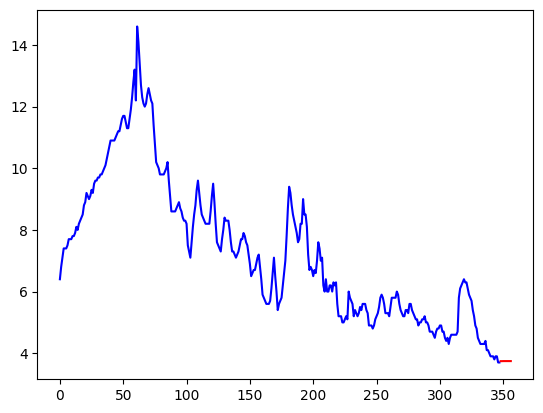

In [ ]:
plt.plot(np.arange(0, len(data)),data, c = 'blue')
plt.plot(np.arange(len(data), len(data_list), 1),data_list[len(data_list)-9:len(data_list):1], c="red")

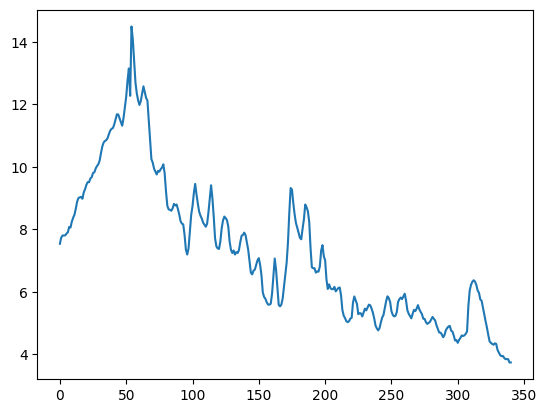

In [ ]:
plt.plot(model_catboost.predict(X))

In [ ]:
ans = pd.DataFrame({"values": answer})
ans

,values
0,3.742818
1,3.742818
2,3.744968
3,3.744968
4,3.744968
5,3.744968
6,3.744968
7,3.744968
8,3.744968


In [ ]:
ans={"DataSet": {"Rows": [
        {"value": 11.0},
        {"value": -2.65},
        {"value": 1.14},
        {"value": 29.05},
        {"value": 13.656},
        {"value": 21.5},
        {"value": -1.34},
        {"value": 9.12},
        {"value": 0.1}]}}

In [ ]:
list_values = []

for i in range(9):
    #print("values", answer[i])
    list_values.append({"value": answer[i]})
post_request = {"DataSet": {"Rows":list_values}}

In [ ]:
str(post_request).replace("'", '"')

'{"DataSet": {"Rows": [{"value": 3.74281826196733}, {"value": 3.74281826196733}, {"value": 3.744968213440704}, {"value": 3.744968213440704}, {"value": 3.744968213440704}, {"value": 3.744968213440704}, {"value": 3.744968213440704}, {"value": 3.744968213440704}, {"value": 3.744968213440704}]}}'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('Data1.csv',sep=';')
for i in range(len(df['value, %'])):
    df['value, %'][i] = float(df['value, %'][i].replace(',','.'))
df['Year'] = df['Year'] - 1990
df['YM'] = df['Year']*df['Month']**3

df_poly = PolynomialFeatures(4).fit_transform(df[['Year','Month','YM']])

model = Ridge().fit(df_poly, df['value, %'])

df

<ipython-input-52-ee3f835d3235>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['value, %'][i] = float(df['value, %'][i].replace(',','.'))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.00969e-39): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,№,Year,Month,"value, %",YM
0,1,4,1,6.4,4
1,2,4,2,6.8,32
2,3,4,3,7.1,108
3,4,4,4,7.4,256
4,5,4,5,7.4,500
...,...,...,...,...,...
343,344,32,8,3.8,16384
344,345,32,9,3.9,23328
345,346,32,10,3.9,32000
346,347,32,11,3.7,42592


In [ ]:
df_test = pd.DataFrame(columns = ['Year','Month', 'YM'])


for i in range(1,10):
    new_row = {'Year': 2023-1990,
               'Month': i,
               'YM': (2023-1990)*i**3}
    df_test.loc[len(df_test)] = new_row

df_test_poly = PolynomialFeatures(4).fit_transform(df_test)

test_pred = model.predict(df_test_poly)

submission = pd.DataFrame(columns = ['value, %'])
for value in test_pred:
    new_row = {'value, %': value}
    submission.loc[len(submission)] = new_row


In [ ]:
df_poly.shape

(348, 35)

In [ ]:
submission.to_csv('/content/sample_submission.csv',index=False)


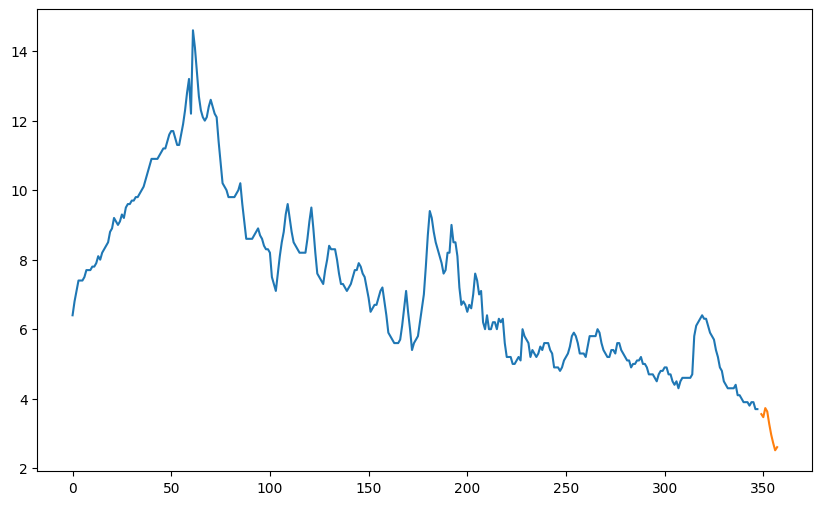

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(df.index, df['value, %'])
plt.plot(np.arange(349,358), test_pred)
plt.show()

In [ ]:
test_pred

array([3.55637773, 3.46822553, 3.72940119, 3.63035855, 3.27324721,
       2.96533197, 2.72468969, 2.51579618, 2.60563815])

In [ ]:
list_values = []
list_values = list(test_pred)

for i in range(9):
    list_values[i] = {"value":list_values[i]}
post_request_body = {"DataSet": {"Rows":list_values}}

post_request_body

{'DataSet': {'Rows': [{'value': 3.5563777311498104},
   {'value': 3.4682255330957217},
   {'value': 3.729401194532243},
   {'value': 3.6303585488491716},
   {'value': 3.2732472142599383},
   {'value': 2.9653319656411856},
   {'value': 2.7246896927894024},
   {'value': 2.5157961777563482},
   {'value': 2.605638154116482}]}}

In [ ]:
post_request_body = {
  "DataSet": {
    "Rows": [
      {
        "value": 3.5563777311498104
      },
      {
        "value": 3.4682255330957217
      },
      {
        "value": 3.729401194532243
      },
      {
        "value": 3.6303585488491716
      },
      {
        "value": 3.2732472142599383
      },
      {
        "value": 2.9653319656411856
      },
      {
        "value":  2.7246896927894024
      },
      {
        "value": 2.5157961777563482
      },
      {
        "value": 2.605638154116482
      }
    ]
  }
}


Весь код ниже нужно в юпитере запускать

In [ ]:
import requests
import json

url = "https://loginom-1.mirea.ru/lgi/rest/Ts_checup_service/MetricsPR1"

session = requests.Session()
request = requests.Request(method='POST',
                           url=url,
                           json=post_request_body).prepare()
request

<PreparedRequest [POST]>

In [ ]:
r = session.send(request, allow_redirects=True)

KeyboardInterrupt: ignored

In [ ]:
r.text

In [ ]:
post_request_body

{'DataSet': {'Rows': [3.5563777311498104,
   3.4682255330957217,
   3.729401194532243,
   3.6303585488491716,
   3.2732472142599383,
   2.9653319656411856,
   2.7246896927894024,
   2.5157961777563482,
   2.605638154116482,
   {'value': 3.74281826196733},
   {'value': 3.74281826196733},
   {'value': 3.744968213440704},
   {'value': 3.744968213440704},
   {'value': 3.744968213440704},
   {'value': 3.744968213440704},
   {'value': 3.744968213440704},
   {'value': 3.744968213440704},
   {'value': 3.744968213440704}]}}